In [1]:
# Import Packages

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
style.use('ggplot')

In [2]:
# Load Data

cA = np.loadtxt("./36_synthetic/class1.txt")
cB = np.loadtxt("./36_synthetic/class2.txt")


In [3]:
# Split data into training and testing
# cA_train cA_test

cA_train,cA_test,cB_train,cB_test = train_test_split(cA, cB, test_size=0.1, random_state=42)

In [ ]:
# Split the data for each class into training and testing data

cA_train,cA_test,cB_train,cB_test,cC_train,cC_test = train_test_split(cA,cB,cC,test_size=0.1, random_state=42)
cA_train,cA_valid,cB_train,cB_valid,cC_train,cC_valid = train_test_split(cA_train,cB_train,cC_train,test_size=0.22, random_state=42)

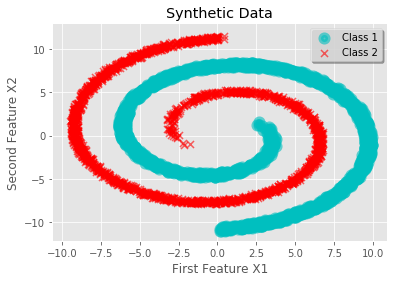

In [4]:
# Plot Data

plt.scatter(cA_train[: , 0], cA_train[:, 1], s=50, c = 'c', marker = 'o', linewidths = 5, zorder = 10, alpha = 0.6, label='Class 1')
plt.scatter(cB_train[: , 0], cB_train[:, 1], s=50, c = 'r', marker = 'x', linewidths = 5, zorder = 10, alpha = 0.6, label='Class 2')

legend = plt.legend(loc='upper right', shadow=True)
plt.title("Synthetic Data")
plt.xlabel("First Feature X1")
plt.ylabel("Second Feature X2")

plt.savefig('./Plots/data_actual.png', bbox_inches='tight')
plt.show()

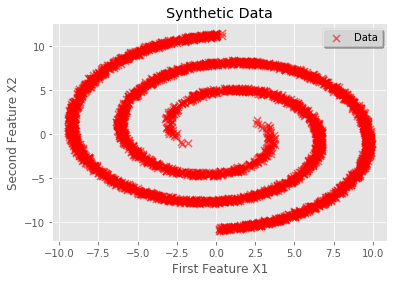

In [5]:
# Reality
# X should contain only the training data from both the classes
# Your X contains the whole data

X = np.loadtxt("./36_synthetic/data.txt")

plt.scatter(X[: , 0], X[:, 1], s=50, c = 'r', marker = 'x', linewidths = 5, zorder = 10, alpha = 0.6, label='Data')

legend = plt.legend(loc='upper right', shadow=True)
plt.title("Synthetic Data")
plt.xlabel("First Feature X1")
plt.ylabel("Second Feature X2")

plt.savefig('./Plots/data.png', bbox_inches='tight')
plt.show()

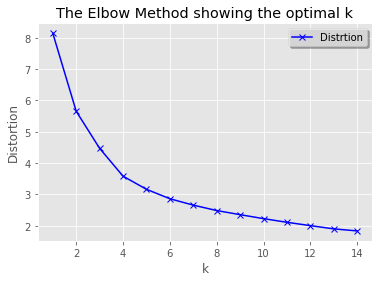

In [6]:
# Determine K

from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow

plt.plot(K, distortions, 'bx-', label = 'Distrtion')

plt.legend(loc = 'upper right', shadow = True)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('./Plots/elbow.png', bbox_inches='tight')
plt.show()

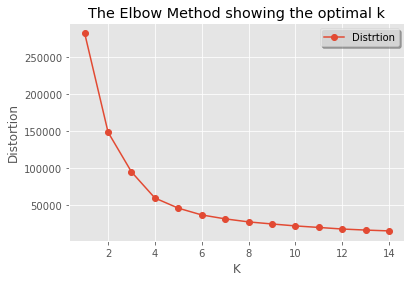

In [7]:
# Determine K
# inertia_ = Sum of distances of samples to their closest cluster center

from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
 
# Plot the elbow
plt.plot(K, distortions, 'o-', label = 'Distrtion')

plt.legend(loc = 'upper right', shadow = True)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('./Plots/inertia.png', bbox_inches='tight')
plt.show()

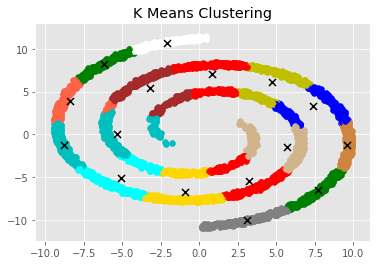

In [8]:
# Do K means

K = 16
clf = KMeans(n_clusters = K)
clf.fit(X)

# Gives the final cetnroids of each cluster
centroids = clf.cluster_centers_

# Label of each data-point
labels = clf.labels_


colors = 10*["g", "r", "c", "b", "y", "gold","gray", "brown", "tan", "w", "peru", "tomato", "aqua"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c = colors[labels[i]], marker = 'o')

plt.scatter(centroids[:, 0], centroids[:, 1], c= 'k', marker = 'x', s = 50,  zorder = 10)

plt.title('K Means Clustering')
plt.savefig('./Plots/KMeans.png', bbox_inches='tight')
plt.show()

In [9]:
# Calculate multivariate normal density in vectorised form

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

In [10]:
clusters = {}

# Each element of the cluster dictionary is the list
for i in range(K):
    clusters[i] = []

# Each element will be a list of all the points belonging to that cluster
for i,j in zip(X, labels):
    clusters[j].append(i)

# Converting each element into an array
for i in clusters:
    clusters[i] = np.array(clusters[i])

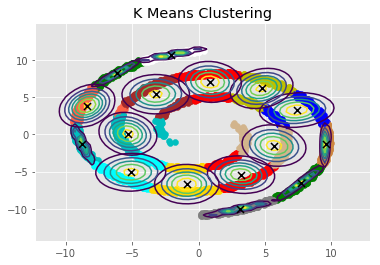

In [11]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
stretch = 1.3
xs = np.linspace(min(X[:,0])*stretch, max(X[:,0])*stretch, N)
ys = np.linspace(min(X[:,1])*stretch, max(X[:,1])*stretch, N)
xs, ys = np.meshgrid(xs, ys)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(xs.shape + (2,))
pos[:, :, 0] = xs
pos[:, :, 1] = ys


# Mean vector and covariance matrix
for index in range(K):
    mu = centroids[index]
    Sigma = np.cov(np.transpose(clusters[index]))

    # The distribution on the variables X, Y packed into pos.
    Z = multivariate_gaussian(pos, mu, Sigma)

    plt.contour(xs, ys, Z)

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c = colors[labels[i]], marker = 'o')
plt.scatter(centroids[:, 0], centroids[:, 1], c= 'k', marker = 'x', s = 50,  zorder = 10)
plt.title('K Means Clustering')
plt.savefig('./Plots/KMeans_cntours.png', bbox_inches='tight')
plt.show()
plt.show()

In [12]:
# pi_k Initialization

def cal_pi_k(clusters):
    '''Calculate pi_k(new) after an iteration from Expectation step or initial KMeans step '''
    pi_k = []
    for i in clusters:
        pi_k.append(clusters[i].shape[0])
    return np.array(pi_k)/X.shape[0]

In [13]:
# Mean Initialization

# Initil means for each mixture

centroids;

In [14]:
# Covariance Initialization
# Calculate Covariance Matrices
# Initil covariances for each mixture

initial_sigma = []
for index in range(K):
    initial_sigma.append(np.cov(np.transpose(clusters[index])))

initial_sigma = np.array(initial_sigma).reshape(-1, 2,2)

In [15]:
# E-step
# Gamma Initialization

def build_gamma(X, mix, mu, sigma):
    
    K = mix.shape[0]
    
    tmp = np.zeros([X.shape[0], K])
    
    for i in range(K):
        mean = mu[i]
        cov = sigma[i]        
        tmp[:, i] = mix[i]*multivariate_normal.pdf(X, mean, cov) # using inbuilt pdf
        #tmp[:, i] = mix[i]*multivariate_gaussian(U, mean, cov)  # self made pdf function
        
    gamma = np.zeros([X.shape[0], K])

    # Instead of using two data structures temp and gamma we can use only 1
    
    for i in range(X.shape[0]):
        temp_sum = sum(tmp[i, :])
        for j in range(K):
            gamma[i][j] = tmp[i][j] / temp_sum
            
    return gamma

In [16]:
initial_pi = cal_pi_k(clusters);
initial_mu = centroids;
initial_sigma;
gamma = build_gamma(X, initial_pi, initial_mu, initial_sigma)

In [38]:
# M-step

# New pi_k
def recal_pi_k(gamma):
    K = gamma.shape[1]
    n_size = gamma.shape[0]
    mix = [0]*K
    for i in range(K):
        mix[i] = sum(gamma[:,i])/n_size
        
    return np.array(mix)
        

# New means
def cal_mu(X, gamma):
    '''Calculate Mu(new) after an iteration from Expectation step or initial KMeans step '''
    
    
    K = gamma.shape[1]
    
    new_centroids = np.empty((K,2))
    
    for k in range(K):
        # Denominator
        temp_sum= sum(gamma[:,k])
        
        temp_s = np.array([0,0], dtype='float64')
        
        # Numerator
        for n in range(X.shape[0]):
            temp_s += gamma[n][k]*X[n]
        if temp_sum > 1:
            new_centroids[k] = temp_s/temp_sum
    
    return new_centroids


# New Sigmas
def cal_sigma(X, gamma, mu):
    
    K = gamma.shape[1]
    new_sigma = np.empty((K , 2,2))
    
    for k in range(K):
        # Denominator
        temp_sum= sum(gamma[:,k])

        temp_s = np.array([[0,0], [0,0]], dtype='float64')
        # Numerator
        for n in range(X.shape[0]):
            t = (X[n] - mu[k]).reshape(1,2)
            temp_s += gamma[n][k] * np.matmul(np.transpose(t), t)

        new_sigma[k] = temp_s / temp_sum
        
    return new_sigma


# calculate score
def calculateScores(pi, mu, sigma):
    scores = np.empty((X.shape[0], 1), dtype = "float64");
    s = 0;

    for n in range(X.shape[0]):
        for k in range(K):
            s += pi[k] * multivariate_gaussian(X[n], mu[k], sigma[k]);
        scores[n] = s;
    return scores;

def threshold(value, limit = 10**-3):
    return value <= 10**-3

In [39]:
new_pi = recal_pi_k(gamma);
new_mu = cal_mu(X, gamma);
new_sigma = cal_sigma(X, gamma, new_mu);
scores = calculateScores(new_pi, new_mu, new_sigma);
new_gamma = build_gamma(X, new_pi, new_mu, new_sigma);

array([False,  True], dtype=bool)